we are trying to talk about are process of recreation, then going to say what are results look like and how they may be different.

In [1]:
#Need to install this package if you have not already
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from linearmodels.panel import PanelOLS
import zipfile
import os

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount = True)



Mounted at /content/drive


In [ ]:
#This cell was used to unzip file path, so I have commented it out.
# Path to the zip file you want to extract
#zip_file_path = '/content/drive/MyDrive/Econ 148 Project 3/Project 3/dataverse_files_witch.zip'

# Directory where you want to extract the contents
#extract_to_directory = '/content/drive/MyDrive/Econ 148 Project 3/Project 3'

# Create the extraction directory if it does not exist
#os.makedirs(extract_to_directory, exist_ok=True)

# Extract the zip file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_to_directory)

#print("Extraction complete.")


In [4]:
# Set the directory path to Google Drive so that the work is saved there
directory_path = '/content/drive/MyDrive/Project 3/'

# Change the current working directory to the specified directory
%cd $directory_path


/content/drive/MyDrive/Econ 148 Project 3/Project 3


# Project 3: Replication of Edward Miguel's Paper Poverty and Witch Killing

In [5]:
#Reading in data containing indicator variables describing village characteristics at a given time. 'vid' is the unique identifer for a village in Tanzania.
#This data is used to produce Table 1, 3, 4, 5, A1 and Figure 1 from the paper.
events_data = pd.read_stata('events_data.dta')
events_data

,vid,year,witch_murders,famine,drought,flood,any_livestock,cholera,measles,diarrhea,...,Iyear23,Iyear24,Iyear25,Iyear26,Iyear27,Iyear28,Iyear29,Iyear30,aidfr,aidngo
0,3192,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,3153,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1041,1992,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,1063,1992,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2092,1992,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,3152,2002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
732,2123,2002,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,NaN,NaN
733,1063,2002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
734,1031,2002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN


# Table 1: Summary Statistics
This is a summary statistics table that explains the mean, standard deviation, and count for each descriptive variable of observations in the data used for this study. Each observation is a household within a village during a given year. The variables describe the types of crime occurring across villages, occurrence of natural calamities, and village characteristics. This study focuses on murders: witch and non-witch murders. The characteristics of the villages focused on in this study are income level, described by consumption expenditure per capita, proportion of households producing cash crops, portion of individuals across villages practicing traditional religions, and proportion of villager members belonging to the Sukuma ethnic group. The calamities focused on in the study are extreme rainfall, categorized by either experiencing drought or flooding, famine, and human and livestock disease.



## Table 1: Panel A

In [6]:
#Creating panel A: Crimes per village
panel_a_crimes = events_data[["witch_murders", "witch_murders_kaya", "witch_tot", "witch_tot_kaya", "oth_murders", "oth_murders_kaya", "tot_murders", "tot_murders_kaya"]].describe()
panel_a_crimes = panel_a_crimes.iloc[0:3].transpose()
panel_a_crimes = panel_a_crimes.iloc[:, [1, 2, 0]]
panel_a_crimes

,mean,std,count
witch_murders,0.091033,0.323461,736.0
witch_murders_kaya,0.000267,0.001061,736.0
witch_tot,0.190217,0.570678,736.0
witch_tot_kaya,0.000558,0.001864,736.0
oth_murders,0.091033,0.395383,736.0
oth_murders_kaya,0.000230,0.001132,736.0
tot_murders,0.182065,0.515875,736.0
tot_murders_kaya,0.000498,0.001562,736.0


## Table 1: Panel B

In [7]:
# Panel B: Natural calamities per village-year
panel_b_calamities = events_data[["any_rain", "rain_2yr", "drought", "flood", "famine", "any_disease", "any_livestock"]].describe()
panel_b_calamities = panel_b_calamities.iloc[0:3].transpose()
panel_b_calamities = panel_b_calamities.iloc[:, [1, 2, 0]]
panel_b_calamities

,mean,std,count
any_rain,0.171196,0.376936,736.0
rain_2yr,0.069293,0.254125,736.0
drought,0.118207,0.323072,736.0
flood,0.057065,0.232125,736.0
famine,0.173913,0.379292,736.0
any_disease,0.148098,0.355438,736.0
any_livestock,0.010870,0.103760,736.0


## Table 1: Panel C

In [8]:
# Panel C: Village characteristics
panel_c_characteristics = events_data[["y_vill", "educat", "hh_sukuma", "cashcrop", "kaya", "norelig", "wmgrp"]].describe()
panel_c_characteristics = panel_c_characteristics.iloc[0:3].transpose()
panel_c_characteristics = panel_c_characteristics.iloc[:, [1, 2, 0]]
panel_c_characteristics

,mean,std,count
y_vill,193.998795,78.115860,736.0
educat,4.034622,1.067853,736.0
hh_sukuma,0.894283,0.173107,736.0
cashcrop,0.606884,0.242545,736.0
kaya,404.461957,179.339935,736.0
norelig,0.654115,0.206191,736.0
wmgrp,0.004052,0.004825,736.0


In [9]:
#creating the final table of summary staticstics (table 1 from paper)
descriptive_statistics = pd.concat([panel_a_crimes, panel_b_calamities, panel_c_characteristics], axis=0)
descriptive_statistics

,mean,std,count
witch_murders,0.091033,0.323461,736.0
witch_murders_kaya,0.000267,0.001061,736.0
witch_tot,0.190217,0.570678,736.0
witch_tot_kaya,0.000558,0.001864,736.0
oth_murders,0.091033,0.395383,736.0
oth_murders_kaya,0.000230,0.001132,736.0
tot_murders,0.182065,0.515875,736.0
tot_murders_kaya,0.000498,0.001562,736.0
any_rain,0.171196,0.376936,736.0
rain_2yr,0.069293,0.254125,736.0


# Creating Table 2: Characteristics of Victims
Table 2 shows the characteristics of witch murder victims. The key take aways from this table: witch murder victims are majority elderly females coming from lower income households with relatives also residing in their village, with 96 percent of victims being female having an average age of 57, and 98 percent live in villages that included relatives.
The majority of victims belong to the Sukuma ethnic group, with 96 percent of the victims being identified as being Sukuma. Victims also tend to be from lower income, where number of household goods owned relative to other victims (69 percent below average), livestock owned relative to other victims (55 percent below average), and land ownership owned relative to other victims (32 percent below average) are used as a proxy for income level.

## Panel A: Demographic characteristics

In [10]:
# Reading in data that contains variables describing demographics of witch murder victims.
witch_data = pd.read_stata("witch_data.dta")
witch_data.head()

,vid,year,recent_victim,gender_rv,age_rv,tribe_rv,month_rv,year_rv,season_rv,alone_rv,relativ_rv,livestock_rv,land_rv,wealth_rv
0,1011,2002,1992.0,1,70,1,8.0,92.0,NaN,1,1,2,1,1.0
1,1012,2002,1996.0,1,30,1,6.0,96.0,NaN,2,1,1,1,1.0
2,1013,2002,NaN,1,40,1,7.0,NaN,NaN,2,1,1,2,1.0
3,1014,2002,1998.0,1,40,1,9.0,98.0,3.0,2,1,1,1,2.0
4,1023,2002,1983.0,1,60,1,3.0,83.0,NaN,2,1,1,2,1.0


In [11]:
#finding the percentage of woman that are murder victims
panel_a_demographics_gender = (witch_data["gender_rv"].value_counts(dropna=False) / len(witch_data)) * 100
#panel_a_demographics_gender = pd.DataFrame(panel_a_demographics_gender)
panel_a_demographics_gender

gender_rv
1    96.226415
2     3.773585
Name: count, dtype: float64

In [12]:
#finding the average age of murder victim
panel_a_demographics_age = (witch_data["age_rv"].mean())
panel_a_demographics_age

57.60377358490566

In [13]:
#percentage of victims that had reletives in the village
panel_a_demographics_relatives = (witch_data["relativ_rv"].value_counts(dropna=False) / len(witch_data)) * 100
panel_a_demographics_relatives

relativ_rv
1    98.113208
2     1.886792
Name: count, dtype: float64

In [15]:
#Percentage of victims who lived in a household with others
panel_a_demographics_alone = (witch_data["alone_rv"].value_counts(dropna=False) / len(witch_data)) * 100
panel_a_demographics_alone

alone_rv
2    86.792453
1    13.207547
Name: count, dtype: float64

In [16]:
#percentage of victims that were in Sukuma ethnic group
panel_a_demographics_tribe = (witch_data["tribe_rv"].value_counts(dropna=False) / len(witch_data)) * 100
panel_a_demographics_tribe

tribe_rv
1    96.226415
2     3.773585
Name: count, dtype: float64

## Panel B: Socio-Economic Characteristics:
 ### This panel uses the total amount of household goods, livestock, and land owned by murder victims as a proxy for wealth.

For this, the author drops the NaNs, and then states that the

In [17]:
# Percentage of murder victims relative average ownership of household goods
N_wealth = len(witch_data.dropna(subset=['wealth_rv']))
panel_b_socioeconomic_wealth = (witch_data["wealth_rv"].value_counts(dropna=True) / N_wealth) * 100
panel_b_socioeconomic_wealth

wealth_rv
1.0    69.387755
2.0    30.612245
Name: count, dtype: float64

In [18]:
# percentage of murder victims who owned livestock relative to average of group
panel_b_socioeconomic_livestock = (witch_data["livestock_rv"].value_counts(dropna=False) / len(witch_data)) * 100
panel_b_socioeconomic_livestock = pd.DataFrame(panel_b_socioeconomic_livestock)
panel_b_socioeconomic_livestock = panel_b_socioeconomic_livestock.rename(columns = {'count':'Ownership of land'}, index = {1:'Below Average', 2:'Average', 3:'Above Average'})
panel_b_socioeconomic_livestock.index.name = None
panel_b_socioeconomic_livestock = panel_b_socioeconomic_livestock.reindex(index=['Below Average', 'Average', 'Above Average'])
panel_b_socioeconomic_livestock

,Ownership of land
Below Average,54.716981
Average,37.735849
Above Average,7.547170


In [19]:
#Percentage of victims owning portions of land relative to average of group
panel_b_socioeconomic_land = ((witch_data["land_rv"].value_counts(dropna=False) / len(witch_data)) * 100)
panel_b_socioeconomic_land = pd.DataFrame(panel_b_socioeconomic_land)
panel_b_socioeconomic_land = panel_b_socioeconomic_land.rename(columns = {'count':'Ownership of land'}, index = {1:'Below Average', 2:'Average', 3:'Above Average'})
panel_b_socioeconomic_land.index.name = None
panel_b_socioeconomic_land = panel_b_socioeconomic_land.reindex(index=['Below Average', 'Average', 'Above Average'])
panel_b_socioeconomic_land

,Ownership of land
Below Average,32.075472
Average,56.603774
Above Average,11.320755


In [20]:
# Panel C: Timing of witch murders
panel_c_timing_year = witch_data["year_rv"].value_counts()
panel_c_timing_season = witch_data["season_rv"].value_counts()
panel_c_timing_season_notnull = witch_data.loc[witch_data["month_rv"].notnull(), "season_rv"].value_counts()
panel_c_timing_month = witch_data["month_rv"].value_counts()


In [21]:
# Test whether proportion of witch murders is same in pre-harvest/harvest "hungry" season and post-harvest season
witch_data["hunger"] = 0
witch_data.loc[(witch_data["month_rv"] > 1) & (witch_data["month_rv"] < 8), "hunger"] = 1
witch_data.loc[witch_data["month_rv"].isnull(), 'hunger'] = np.nan
ttest_hunger = sm.stats.ttest_ind(witch_data.loc[witch_data["hunger"].notnull(), "hunger"], np.repeat(0.5, len(witch_data.loc[witch_data["hunger"].notnull(), "hunger"])))


# Table 3: Impact of Rainfall on Income

##Defining the Control Variables
Here, we are defining control groups. This is emulating the global controls that the author defines in their .do file.

In [22]:
#defining the control variables
rain = ["flood", "drought"]

controls = ["y_vill", "educat", "cashcrop", "kaya", "hh_sukuma", "norelig", "wmgrp"]

controls_y = ["educat", "cashcrop", "kaya", "hh_sukuma", "norelig", "wmgrp"]

diseases = ["any_disease"]

rain_lags = ["post_rain", "any_rain", "rain_2yr"]

## Table 3: OLS Model 1
For this regression model, we must create a new variable called "ward_yr" by taking the "year" variable multipling it by 100, and adding the variable "wardno" to it. This is done to create a unique identifier for our multivariable observation.

We must also generate a new variable called "Iward_yr" which contains numeric codes representing the unique values of "ward_yr". This is useful for our categorical analysis.

Next, we drop the variable "Iward_yr1", which whe have done to address multicollinearity problem.

We then create a loop where the variable "num" takes the value of 2001. This loop iterates over different years for subsequent regression analyses.

Finally, we run our linear regression analysis. We regress the dependent variable "y_vill" on the independent variables "any_rain", "controls_y",  "Idiv2", and "Idiv3", but only for observations where the variable "year" is equal to the value defined in "num". We also weight our regression model using the variable "kaya", and use robust standard errors by specifying cov_type='HC3', which is the most rubust specification.
This regression runs separately for each year specified in the loop.

In [23]:
# Create the ward_yr variable
events_data['ward_yr'] = 100 * events_data['year'] + events_data['wardno']

# Generate unique codes for ward_yr
events_data['Iward_yr'] = pd.factorize(events_data['ward_yr'])[0]

# Drop unnecessary variable
events_data.drop(columns=['Iward_yr1'], inplace=True, errors='ignore')

# List of years to iterate over
years = [2001]

# Loop over each year
for num in years:
    # Filter the data for the current year
    subset_data = events_data[events_data['year'] == num]

# Define the independent variables
independent_vars = ['any_rain', 'educat', 'cashcrop', 'kaya', 'hh_sukuma', 'norelig', 'wmgrp', 'Idiv2', 'Idiv3']

# Defining the dependent variable
dependent_var = 'y_vill'

# Defining weight variable
weight_var = 'kaya'

# Filtering out any missing values
subset_data = subset_data.dropna(subset=independent_vars + [dependent_var])

# Creating the independent variables
X = subset_data[independent_vars]

# Creating dependent variables
y = subset_data[dependent_var]

# Creating weight variable
weights = subset_data[weight_var]

# Fit the wieghted linear regression model
model = sm.WLS(y, sm.add_constant(X), weights=weights)

resultsA = model.fit(cov_type='HC3')

# Print the regression results
print(resultsA.summary())


                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.141
Model:                            WLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.305
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.255
Time:                        06:52:54   Log-Likelihood:                -387.69
No. Observations:                  67   AIC:                             795.4
Df Residuals:                      57   BIC:                             817.4
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.3298    128.164      1.337      0.1

### Our standard errors didn't match the authors finding, so we respecify the model using standard errors with weaker robusness ('HC2').

In [24]:
resultsB = model.fit(cov_type='HC2')
# Print the regression results
print(resultsB.summary())

                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.141
Model:                            WLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.648
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.124
Time:                        06:52:54   Log-Likelihood:                -387.69
No. Observations:                  67   AIC:                             795.4
Df Residuals:                      57   BIC:                             817.4
Df Model:                           9                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.3298    108.694      1.576      0.1

#### The standard errors of our model still isn't matching, so we respecify the model again using even lest robust standard errors ('HC1'). This gives use standard error equivelent to that of the authors findings.



In [25]:
resultsC = model.fit(cov_type='HC1')
# Print the regression results
print(resultsC.summary())

                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.141
Model:                            WLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.783
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0916
Time:                        06:52:54   Log-Likelihood:                -387.69
No. Observations:                  67   AIC:                             795.4
Df Residuals:                      57   BIC:                             817.4
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.3298    101.897      1.681      0.0

## Table 3: OLS Model 2
We run regression the same independent variable as before, but we add our 'diseases' control. We also follow a similar methedology as in Model 1, where we begin with most robust standard errors, and loosen restrictions until we obtain same results as author. This occurs when we specify the covariance to 'HC1'. We do this to verify that over robusness specifications aren't used.

In [26]:
# Defining independent variables
independent_vars2 = ['any_rain'] + controls_y + ['Idiv2', 'Idiv3'] + diseases

# Defining dependent variable
dependent_var2 = 'y_vill'

# Filter the data for the specific year
subset_data_year = subset_data[subset_data['year'] == num]

# Filter out any missing values if needed
subset_data_year = subset_data_year.dropna(subset=independent_vars2 + [dependent_var2])

# Creating independent variable
X2 = subset_data_year[independent_vars2]

# Creating dependent variable
y2 = subset_data_year[dependent_var2]

# Fit the weighted linear regression model
model2 = sm.WLS(y2, sm.add_constant(X2), weights=weights)

results2A = model2.fit(cov_type='HC3')

# Print the regression results
print(results2A.summary())


                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.142
Model:                            WLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                     1.350
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.228
Time:                        06:52:54   Log-Likelihood:                -387.66
No. Observations:                  67   AIC:                             797.3
Df Residuals:                      56   BIC:                             821.6
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         169.1412    142.324      1.188      

### Specifying less robust model ('HC2')

In [27]:
results2B = model2.fit(cov_type='HC2')

# Print the regression results
print(results2B.summary())

                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.142
Model:                            WLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                     1.736
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0951
Time:                        06:52:54   Log-Likelihood:                -387.66
No. Observations:                  67   AIC:                             797.3
Df Residuals:                      56   BIC:                             821.6
Df Model:                          10                                         
Covariance Type:                  HC2                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         169.1412    119.175      1.419      

### Specifying least robust model ('HC1'). This model recovers same standard errors as the author.

In [28]:
results2C = model2.fit(cov_type='HC1')

# Print the regression results
print(results2C.summary())

                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.142
Model:                            WLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                     1.866
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0699
Time:                        06:52:54   Log-Likelihood:                -387.66
No. Observations:                  67   AIC:                             797.3
Df Residuals:                      56   BIC:                             821.6
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         169.1412    110.964      1.524      

## Table 3: OLS Model 3
We are regressing the the 'rain', 'control_y', and geographic fixed effects ('Idiv2', 'Idiv3') on 'y_vill'. With this model, we are repeating same process as above in previous model by specifying the most robust standard errors and then respecifying the model until we reach the same results as the author.

In [29]:
# Defining independent variables
independent_vars3 = rain + controls_y + ['Idiv2', 'Idiv3']

# Defining dependent variable
dependent_var3 = 'y_vill'

# Filter the data for the specific year
subset_data_year = subset_data[subset_data['year'] == num]

# Filter out any missing values if needed
subset_data_year = subset_data_year.dropna(subset=independent_vars3 + [dependent_var3])

# Creating independent variable
X3 = subset_data_year[independent_vars3]

# Creating dependent variable
y3 = subset_data_year[dependent_var3]

# Fit the weighted linear regression model
model3 = sm.WLS(y3, sm.add_constant(X3), weights=weights)

results3A = model3.fit(cov_type='HC3')

# Print the regression results
print(results3A.summary())


                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.148
Model:                            WLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                     1.685
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.107
Time:                        06:52:54   Log-Likelihood:                -387.41
No. Observations:                  67   AIC:                             796.8
Df Residuals:                      56   BIC:                             821.1
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.1464    130.026      1.324      0.1

### (cov_type='HC2')

In [30]:
results3B = model3.fit(cov_type='HC2')

# Print the regression results
print(results3B.summary())


                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.148
Model:                            WLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                     2.114
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0383
Time:                        06:52:54   Log-Likelihood:                -387.41
No. Observations:                  67   AIC:                             796.8
Df Residuals:                      56   BIC:                             821.1
Df Model:                          10                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.1464    109.567      1.571      0.1

### (cov_type='HC1')

In [31]:
results3C = model3.fit(cov_type='HC1')

# Print the regression results
print(results3C.summary())

                            WLS Regression Results                            
Dep. Variable:                 y_vill   R-squared:                       0.148
Model:                            WLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                     2.278
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0256
Time:                        06:52:54   Log-Likelihood:                -387.41
No. Observations:                  67   AIC:                             796.8
Df Residuals:                      56   BIC:                             821.1
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.1464    103.216      1.668      0.0

## Table 3: OLS Model 4
For this model, we are clustering by values in the "vid" column. We regress "any_disease" on "famine" indicator. This regression absorb the effects of 'vid' and cluster standard errors by 'vid'. This model produces slightly different estimates than author.


In [32]:
for var in ['famine']:
    model_ols4 = sm.WLS(events_data[var], sm.add_constant(events_data[['any_rain'] + diseases])).fit(cov_type='cluster', cov_kwds={'groups': events_data['vid']})
    print(model_ols4.summary())

                            WLS Regression Results                            
Dep. Variable:                 famine   R-squared:                       0.162
Model:                            WLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     23.03
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.60e-08
Time:                        06:52:54   Log-Likelihood:                -265.36
No. Observations:                 736   AIC:                             536.7
Df Residuals:                     733   BIC:                             550.5
Df Model:                           2                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0985      0.012      7.959      

## Table 3: OLS Model 5
For this model, we are getting slightly different result. correct clustering, correct weights, correct fixed effects.

In [33]:
for var in ["any_disease"]:
    X = sm.add_constant(events_data[["any_rain"]])
    y = events_data[var]
    w = events_data['kaya']
    model = sm.WLS(y, X, weights=w).fit(cov_type='cluster', cov_kwds={'groups': events_data['vid']})
    print(model.summary())

                            WLS Regression Results                            
Dep. Variable:            any_disease   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.203
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.143
Time:                        06:52:54   Log-Likelihood:                -329.78
No. Observations:                 736   AIC:                             663.6
Df Residuals:                     734   BIC:                             672.8
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1655      0.013     12.433      0.0

## Compiling Table 3
We use stargazer to combine regression results, to_latex is used to convert pyhon code to latex.

> Add blockquote



In [34]:
# install packed if have not already
!pip install stargazer

from stargazer.stargazer import Stargazer

# Initialize Stargazer object with the specified models
stargazer = Stargazer([resultsC, results2C, results3C, model_ols4, model])

# Define the order and labels of covariates to match the paper
ordered_covariates = [
    'const', 'drought', 'flood', 'educat', 'hh_sukuma',
    'cashcrop', 'kaya', 'norelig', 'wmgrp', 'Idiv2', 'Idiv3'
]

covariate_labels = {
    'const': 'Extreme rainfall (drought or flood)',
    'drought': 'Drought',
    'flood': 'Flood',
    'educat': 'Average years of education',
    'hh_sukuma': 'Proportion Sukuma ethnic group',
    'cashcrop': 'Proportion households grow cash crops',
    'kaya': 'Households per village/1000',
    'norelig': 'Proportion practice traditional religions',
    'wmgrp': 'Women’s community groups per household',
    'Idiv2': 'Geographic division fixed effects',
    'Idiv3': 'Village fixed effects (67 villages)',
}

# Update the labels to include the separate 'diseases' variable
covariate_labels.update({'diseases': 'Human disease epidemic'})

# Configure Stargazer options
stargazer.title('Table 3: Regression Results')
stargazer.custom_columns(['OLS(1)', 'OLS(2)', 'OLS(3)', 'OLS(4)', 'OLS(5)'], [1, 1, 1, 1, 1])
stargazer.covariate_order(ordered_covariates)
stargazer.rename_covariates(covariate_labels)
stargazer.significant_digits(3)
stargazer.show_model_numbers(False)
stargazer.show_degrees_of_freedom(False)

# Render the LaTeX code for landscape orientation
#latex_code = "\\begin{landscape}\n" + stargazer.render_latex() + "\n\\end{landscape}"

# Print the full LaTeX code for the table in landscape
print(latex_code)


NameError: name 'latex_code' is not defined

# Figure 1: Proportion of Villages with Extreme Rainfall and Average Witch Murders (1992–2002)
Figure 1 is a time series visualization with 2 trend lines: one showing proportion of villages which experience extreme rainfall (indicated by drought of flooding), and the other showing average number of witch murders across all villages within sample (n=736) during given year. This data contains years 1992-2002, so 10 years of data. The peak (local maximum) for the extreme rainfall trendline occurs in 1998, where about half of the villages in the sample experienced extreme rainfall. The peak (local maximum) for average witch murders occurs at the year 1997, which has a value of about 0.2. This graph depicts the positive relationship between extreme rainfall and average witch murders by year. As the proportion of villages experiencing extreme rainfall increases, the murder of witches tend to also increase, on average.

NOTE: the graph we produce has slight differences from that of the author. Notice from our graph, we have see

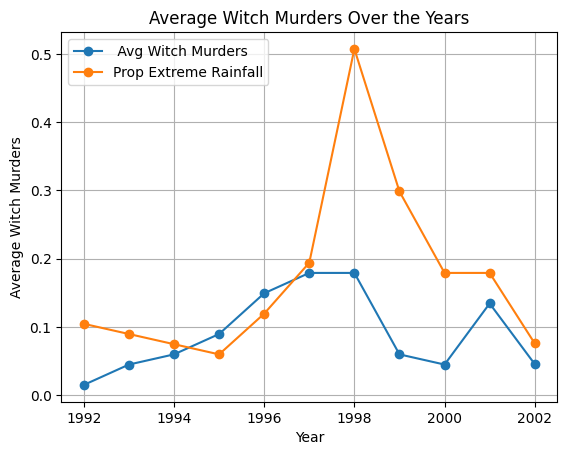

In [35]:
#making graph
events_data["year"] = events_data["year"].astype(int)
rain_yr_data = events_data.groupby("year").agg({"witch_murders": "mean", "any_rain": "mean"}).reset_index().dropna()
plt.plot(rain_yr_data["year"], rain_yr_data["witch_murders"], marker='o', label=' Avg Witch Murders')
plt.plot(rain_yr_data["year"], rain_yr_data["any_rain"], marker='o', label='Prop Extreme Rainfall')
plt.xlabel("Year")
plt.ylabel("Average Witch Murders")
plt.title("Average Witch Murders Over the Years")
plt.grid(True)
plt.legend()

#saving the figure
plt.savefig('rain_avgwitchkillings.png')

#making sure I can see the plot
plt.show()


# Table 4: Extreme Rainfall and Witch Murders
Here we recreate OLS model 1-5 for the author original findings. Our estimates differ slightly for that of the author's for all of our models.   

###OLS Model 1, Table 4

In [36]:
for var in ['witch_murders']:
    model_areg1 = sm.WLS(events_data[var], sm.add_constant(events_data[['any_rain']])).fit(cov_type='cluster', cov_kwds={'groups': events_data['vid']})
    print(model_areg1.summary())

                            WLS Regression Results                            
Dep. Variable:          witch_murders   R-squared:                       0.005
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.045
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0856
Time:                        06:54:58   Log-Likelihood:                -211.17
No. Observations:                 736   AIC:                             426.3
Df Residuals:                     734   BIC:                             435.5
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0803      0.015      5.401      0.0

###OLS Model 2, Table 4

In [ ]:
# regressing extreme rainfall on 'y_vill', 'educat', 'cashcrop', 'kaya', 'hh_sukuma', 'norelig', 'wmgrp', 'Idiv2', 'Idiv3' custering by 'vid2' and weighting the model by 'kaya'.
model_regress = sm.OLS(events_data[var], sm.add_constant(events_data[['any_rain'] + controls + ['Idiv2', 'Idiv3']])).fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})
print(model_regress.summary())


###OLS Model 3, Table 4

In [ ]:
# areg `var' $rain_lags [aw=kaya], a(vid2) robust cluster(vid2);
model_areg2 = sm.OLS(events_data[var], sm.add_constant(events_data[rain_lags])).fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})
print(model_areg2.summary())


###OLS Model 4, Table 4

In [ ]:
# areg `var' any_rain $diseases [aw=kaya], a(vid2) robust cluster(vid2);
model_areg3 = sm.OLS(events_data[var], sm.add_constant(events_data[['any_rain'] + diseases])).fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})
print(model_areg3.summary())


###OLS Model 5, Table 4

In [ ]:
# areg `var' any_rain Iyear* [aw=kaya], a(vid2) robust cluster(vid2);
year_cols = [col for col in events_data.columns if 'Iyear' in col]
model_areg4 = sm.OLS(events_data[var], sm.add_constant(events_data[['any_rain'] + year_cols])).fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})
print(model_areg4.summary())

## Table 4 compilation
Here we compile the regression estimates into a single table and converting to latex file.

In [ ]:
stargazer1 = Stargazer([model])

# Set covariate order and labels as per the paper's table
ordered_covariates = ['const', 'any_rain', 'any_rain_lag', 'any_rain_lag2', 'diseases'] + year_cols
covariate_labels = {
    'const': 'Extreme rainfall (drought or flood)',
    'any_rain': 'Extreme rainfall, current year',
    'any_rain_lag': 'Extreme rainfall, previous year',
    'any_rain_lag2': 'Extreme rainfall, current year and previous year',
    'diseases': 'Human disease epidemic'
}

# Update the labels and order in the Stargazer object
stargazer1.rename_covariates(covariate_labels)
stargazer1.covariate_order(ordered_covariates)

# Define the custom column labels as per the paper's table
stargazer1.custom_columns(['OLS(1)', 'OLS(2)', 'OLS(3)', 'OLS(4)', 'OLS(5)'], [1, 1, 1, 1, 1])

# Add additional configurations to Stargazer
stargazer1.title('Table 4: Extreme Rainfall and Witch Murders')
stargazer1.significant_digits(3)
stargazer.show_model_numbers(False)

# Render LaTeX code
latex_code = stargazer.render_latex()
print(latex_code)

## TABLE 5: Extreme Rainfall and Violent Crime

###OLS Model 1, Table 5

In [ ]:
events_data['extreme_rainfall'] = events_data['drought'] | events_data['flood']

events_data['pseudo_time'] = 1

events_data = events_data.set_index(['vid2', 'pseudo_time'], drop=False)

dependent_vars = ['witch_murders']

for var in dependent_vars:
    y = events_data[var]
    X = sm.add_constant(events_data['extreme_rainfall'])

    model = PanelOLS(y, X, entity_effects=True).fit(cov_type='clustered', cluster_entity=True)

    print(model.summary)


###OLS Model 1, Table 5

### OLS Model 2, Table 5

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X7 = events_data[['any_rain', 'kaya']]
y7 = events_data['witch_murders_kaya']

# Add a constant term
X7 = sm.add_constant(X7)

# Fit the regression model
model7 = sm.WLS(y7, X7, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results7 = model7.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results7.summary())

###OLS Model 3, Table 5

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X8 = events_data[['any_rain']]
y8 = events_data['witch_tot']

# Add a constant term
X8 = sm.add_constant(X8)

# Fit the regression model
model8 = sm.WLS(y8, X8, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results8 = model8.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results8.summary())

### OLS Model 4, Table 5

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X9 = events_data[['any_rain']]
y9 = events_data['witch_tot_kaya']

# Add a constant term
X9 = sm.add_constant(X9)

# Fit the regression model
model9 = sm.WLS(y9, X9, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results9 = model9.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results9.summary())


### OLS Model 5, Table 5

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X10 = events_data[['any_rain', 'kaya']]
y10 = events_data['oth_murders']

# Add a constant term
X10 = sm.add_constant(X10)

# Fit the regression model
model10 = sm.WLS(y10, X10, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results10 = model10.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results10.summary())

### OLS Model 6, Table 5

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X11 = events_data[['any_rain', 'kaya']]
y11 = events_data['oth_murders_kaya']

# Add a constant term
X11 = sm.add_constant(X11)

# Fit the regression model
model11 = sm.WLS(y11, X11, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results11 = model11.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results11.summary())

###OLS Model 7, Table 5
Regressing extreme rain events on total murders.

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X12 = events_data[['any_rain']]
y12 = events_data['tot_murders']

# Add a constant term
X12 = sm.add_constant(X12)

# Fit the regression model
model12 = sm.WLS(y12, X12, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results12 = model12.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results12.summary())

###OLS Model 8, Table 5
Regressing any rain event on total murders.

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
X13 = events_data[['any_rain', 'kaya']]
y13 = events_data['tot_murders_kaya']

# Add a constant term
X13 = sm.add_constant(X13)

# Fit the regression model
model13 = sm.WLS(y13, X13, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results13 = model13.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results13.summary())

# Table 5: Summary
Compiling all OLS model results into on tabel abd then printing into latex code.

In [ ]:
stargazer3 = Stargazer([results6, results7, results8, results9, results10, results11, results12, results13])

# Now, configure the Stargazer object to match the format of the table in the attached photo.

stargazer3.title('TABLE 5: Extreme rainfall and violent crime')
stargazer3.custom_columns(['Coefficient estimate on extreme rainfall (drought or flood)', 'R^2', 'Root MSE'], [1, 1, 1])
stargazer3.show_model_numbers(False)
stargazer3.significant_digits(3)

# If you want to add custom notes to the bottom of the table, you could do it like this:
stargazer3.add_custom_notes(['Huber robust standard errors in parentheses. Significantly different from zero at 90% (*), 95% (**), 99% (***).'])

# Finally, you would print out the LaTeX code generated by Stargazer.
latex_code = stargazer.render_latex()
print(latex_code)

#Table A1: Extreme Rainfall and Witch Murders, Robustness

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
xvars = ['any_rain', 'kaya', 'Idiv2', 'Idiv3'] + controls

X14 = events_data[xvars]
y14 = events_data['witch_murders']

# Add a constant term
X14 = sm.add_constant(X14)

# Fit the regression model
model14 = sm.WLS(y14, X14, weights=events_data['kaya'])

# Cluster standard errors at the 'vid2' level
results14 = model14.fit(cov_type='cluster', cov_kwds={'groups': events_data['vid2']})

# Print the regression results
print(results14.summary())